In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train_balanced.csv')

In [4]:
df = data[['label', 'comment']]

In [6]:
df.head

<bound method NDFrame.head of          label                                            comment
0            0                                         NC and NH.
1            0  You do know west teams play against west teams...
2            0  They were underdogs earlier today, but since G...
3            0  This meme isn't funny none of the "new york ni...
4            0                    I could use one of those tools.
...        ...                                                ...
1010821      1  I'm sure that Iran and N. Korea have the techn...
1010822      1                 whatever you do, don't vote green!
1010823      1  Perhaps this is an atheist conspiracy to make ...
1010824      1  The Slavs got their own country - it is called...
1010825      1  values, as in capitalism .. there is good mone...

[1010826 rows x 2 columns]>

In [8]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tahor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tahor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Data Preparation

In [12]:
from xml.etree.ElementTree import Comment
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

def CleanTokenize(df):
    comments = []
    Comment = df['comment'].values.tolist()

    # Basic cleaning
    for comment in Comment:
        if isinstance(comment, str):  # Check if the comment is a string
            comment = comment.strip()  # remove whitespaces
            comment = comment.lower()  # lowercase
            comment = ''.join(char for char in comment if not char.isdigit())  # remove numbers

            # Tokenize the text
            tokens = word_tokenize(comment)

            # Remove punctuation
            table = str.maketrans('', '', string.punctuation)
            stripped = [w.translate(table) for w in tokens]

            # Remove non-alphabetic characters
            words = [word for word in stripped if word.isalpha()]

            stop_words = set(stopwords.words('english'))
            # Remove stop words
            words = [w for w in words if not w in stop_words]

            comments.append(words)

    return comments

comments = CleanTokenize(df)




In [13]:
comments[0:10]

[['nc', 'nh'],
 ['know', 'west', 'teams', 'play', 'west', 'teams', 'east', 'teams', 'right'],
 ['underdogs',
  'earlier',
  'today',
  'since',
  'gronk',
  'announcement',
  'afternoon',
  'vegas',
  'line',
  'moved',
  'patriots'],
 ['meme', 'nt', 'funny', 'none', 'new', 'york', 'nigga', 'ones'],
 ['could', 'use', 'one', 'tools'],
 ['nt',
  'pay',
  'attention',
  'long',
  'legal',
  'would',
  'nt',
  'kick',
  'bed',
  'took',
  'load'],
 ['trick', 'treating', 'general', 'weird'],
 ['blade', 'masterymasamune', 'gtfo'],
 ['nt', 'good', 'build', 'buy', 'games', 'save'],
 ['would', 'love', 'see', 'lolla']]

### Visualizing the most occured words

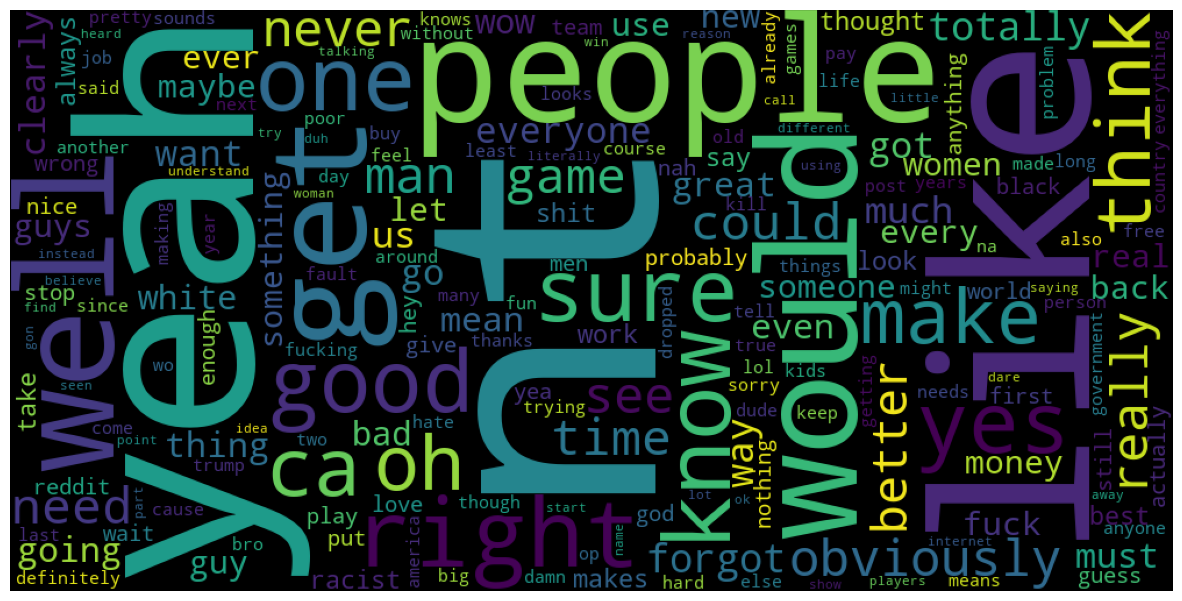

In [17]:
from collections import Counter  # Corrected import statement
from wordcloud import WordCloud, ImageColorGenerator  # Corrected import statement
import matplotlib.pyplot as plt  # Added import statement for matplotlib

pos_df = df.loc[df['label'] == 1]  # Corrected comparison operator and assignment

pos_comments = CleanTokenize(pos_df)  # Corrected function name to CleanTokenize

pos_comment = [j for sub in pos_comments for j in sub]

word_cloud_dict = Counter(pos_comment)  # Corrected variable name

word_cloud = WordCloud(width=1000, height=500).generate_from_frequencies(word_cloud_dict)  # Corrected variable names and added missing "=" sign

plt.figure(figsize=(15, 8))  # Corrected parentheses and added import statement for matplotlib
plt.imshow(word_cloud)  # Corrected function name
plt.axis('off')

plt.show()  # Added show() function to display the plot


### Tokenizing, padding and embedding and the Model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense
import numpy as np

# Tokenization and sequence padding
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(comments)
sequences = tokenizer_obj.texts_to_sequences(comments)
word_index = tokenizer_obj.word_index
vocab_size = len(tokenizer_obj.word_index) + 1
comments_pad = pad_sequences(sequences, padding='post')

# Sentiment shuffling
indices = np.arange(comments_pad.shape[0])
np.random.shuffle(indices)
sentiment = sentiment[indices]

# Embedding layer
embedding_dim = 100  # Set the desired embedding dimension
embedding_matrix = np.random.random((vocab_size, embedding_dim))  # Random initialization for demonstration
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=True)

# Model input
X = comments_pad
y = sentiment

# Model architecture
model = Sequential()
model.add(embedding_layer)
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
 6827/25270 [=======>......................] - ETA: 46:42 - loss: 0.6948 - accuracy: 0.5007

### Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

### Fine-tuning and Optimization

### Deployment and Application